<a href="https://colab.research.google.com/github/purosh96/NeuralNetwork/blob/main/mnist_SingleLayer_TF1X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'1.15.2'

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True);

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [ ]:
mnist.test.images.shape,mnist.test.labels.shape

((10000, 784), (10000, 10))

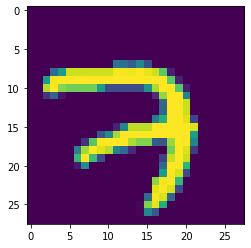

In [ ]:
plt.imshow(mnist.train.images[0].reshape(28,28))

In [ ]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
mnist.train.labels[0].argmax()

7

In [ ]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

In [ ]:
w = tf.Variable(tf.truncated_normal([784,10]))
b = tf.Variable(tf.truncated_normal([10]))

In [ ]:
I = tf.matmul(x,w) + b
O = tf.nn.softmax(I)

In [ ]:
IL = tf.nn.softmax_cross_entropy_with_logits_v2(labels= y,logits = O)
L = tf.reduce_mean(IL)

In [ ]:
gdo = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = gdo.minimize(L)

In [ ]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [ ]:
for i in range(10000):
  f, l  = mnist.train.next_batch(1000)
  sess.run(train,feed_dict={x:f,y:l})

In [ ]:
result = sess.run(O,feed_dict={x:mnist.test.images})

In [ ]:
result = sess.run(tf.argmax(result,1))

In [ ]:
result

array([7, 2, 1, ..., 4, 8, 2])

In [ ]:
actual = sess.run(tf.argmax(mnist.test.labels,1))
actual

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(actual,result)

0.7386